<a href="https://colab.research.google.com/github/hemang03/tensorflow_tutotrial/blob/master/imdb_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels) , (test_data , test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
def vectorize_sequence(sequence , dimensions = 10000):
  results = np.zeros((len(sequence) , dimensions))
  for  i , sequence in enumerate(sequence):
    results[i,sequence] = 1
  return results  

In [15]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [16]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(units=16 , activation='relu' , input_shape=(10000,)))
model.add(Dense(units=16 , activation='relu' ))
model.add(Dense(units=1 , activation='sigmoid' ))

In [21]:
model.compile(optimizer='rmsprop' , loss='binary_crossentropy' , metrics=['accuracy'])

In [24]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
from keras import losses
from keras import metrics

In [26]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [28]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

In [29]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
history=model.fit(partial_X_train,partial_y_train , epochs=20 , batch_size=512 , validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0027 - binary_accuracy: 0.9999 - val_loss: 0.7100 - val_binary_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0046 - binary_accuracy: 0.9993 - val_loss: 0.7242 - val_binary_accuracy: 0.8675
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0017 - binary_accuracy: 0.9999 - val_loss: 0.7563 - val_binary_accuracy: 0.8661
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0048 - binary_accuracy: 0.9991 - val_loss: 0.7910 - val_binary_accuracy: 0.8653
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0010 - binary_accuracy: 0.9999 - val_loss: 0.8138 - val_binary_accuracy: 0.8655
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 8.7435e-04 - binary_accuracy: 0.9999 - val_loss: 0.8621 - val_binary_accuracy: 0.8646
Epoch 7/20
30/30 [==============================] - 1s 31ms/step -

In [32]:
import matplotlib.pyplot as plt


In [33]:
history_dict = history.history

In [34]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [41]:
acc = history.history['binary_accuracy']
loss_values = history_dict['loss']
val_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)



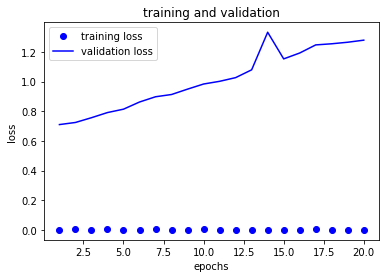

In [43]:
plt.plot(epochs , loss_values ,'bo' , label='training loss')
plt.plot(epochs , val_values ,'b', label='validation loss')
plt.title('training and validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [44]:
plt.clf()

<Figure size 432x288 with 0 Axes>

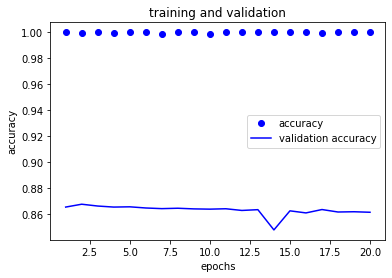

In [45]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs , acc_values ,'bo' , label='accuracy')
plt.plot(epochs , val_acc_values ,'b', label='validation accuracy')
plt.title('training and validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [46]:
model1 = Sequential()
model1.add(Dense(units=16 , activation='relu' , input_shape=(10000,)))
model1.add(Dense(units=16 , activation='relu'))
model1.add(Dense(units=1 , activation='sigmoid'))

In [50]:
model1.compile(optimizer='rmsprop' , loss='binary_crossentropy' , metrics=['accuracy'])

In [51]:
model1.fit(X_train,y_train , epochs=20 , batch_size=512 , validation_data=(X_test ,y_test))

Epoch 1/20
49/49 [==============================] - 3s 64ms/step - loss: 0.4532 - accuracy: 0.8182 - val_loss: 0.3416 - val_accuracy: 0.8728
Epoch 2/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2594 - accuracy: 0.9089 - val_loss: 0.2927 - val_accuracy: 0.8845
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1990 - accuracy: 0.9292 - val_loss: 0.3016 - val_accuracy: 0.8772
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1671 - accuracy: 0.9419 - val_loss: 0.2919 - val_accuracy: 0.8838
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1440 - accuracy: 0.9496 - val_loss: 0.3084 - val_accuracy: 0.8802
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1272 - accuracy: 0.9549 - val_loss: 0.3305 - val_accuracy: 0.8769
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1108 - accuracy: 0.9615 - val_loss: 0.3669 - val_accuracy: 0.8691
Epoch 8/20
49

In [52]:
model1.evaluate(X_test ,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7699 - accuracy: 0.8511


[0.7699317932128906, 0.8510800004005432]

In [53]:
model1.predict(X_test)

array([[0.01592168],
       [0.9999997 ],
       [0.97437346],
       ...,
       [0.07106394],
       [0.01886004],
       [0.9759766 ]], dtype=float32)